<div>
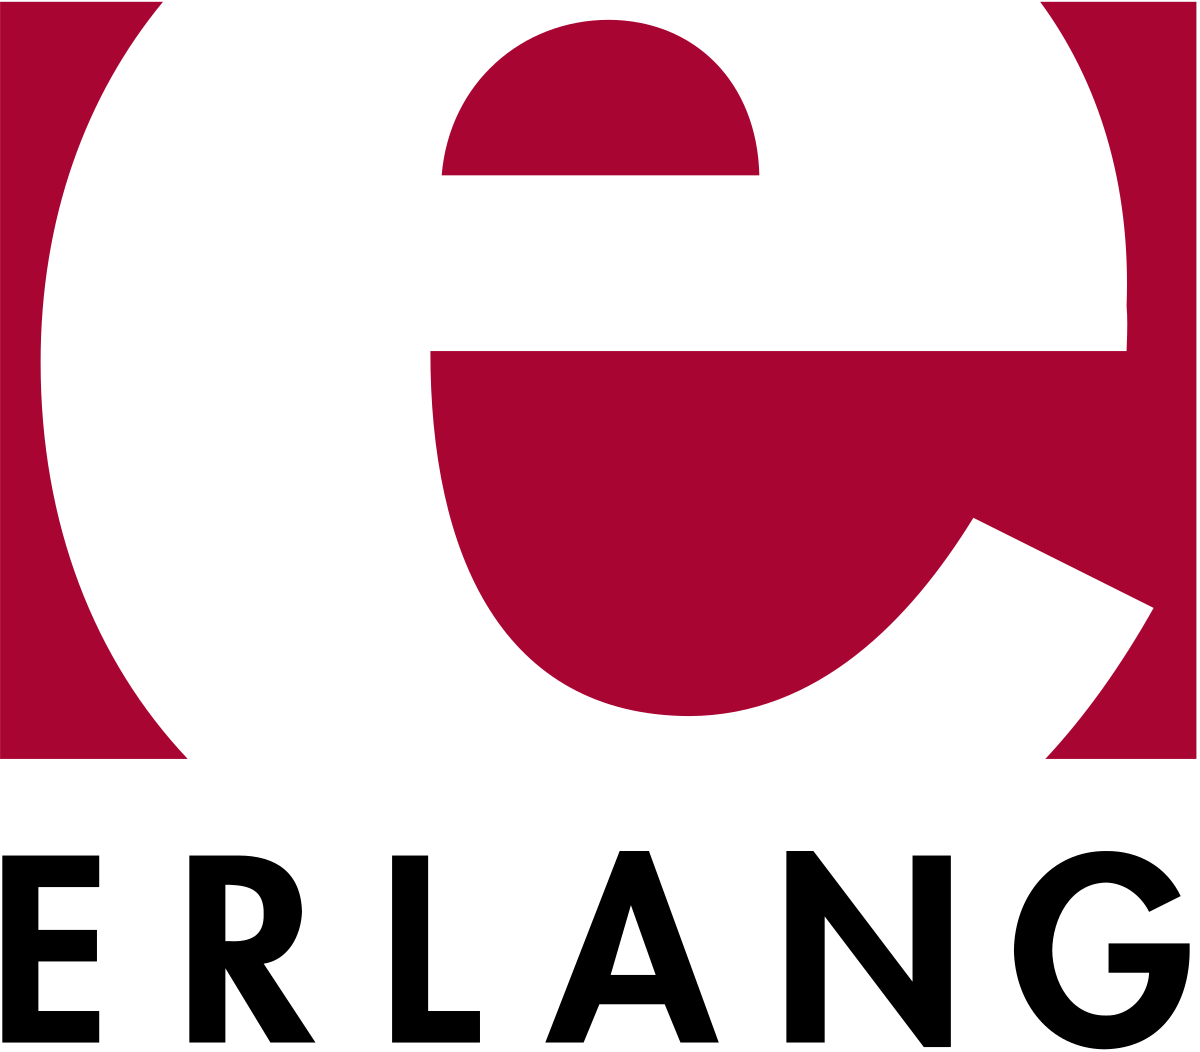
</div>


# Tutorial ERLANG
Integrantes:


Gabriel Avendaño  
Juan Diego Medina  
Santiago Duque  

## 1. Instalación

### Instalación en distribuciones basadas en Debian
1. Ejecutar el comando

```
sudo apt-get install erlang erlang-doc
```
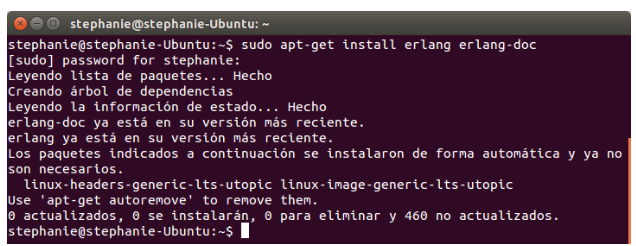
2. Verificar la instalación con el comando
```
erl
```
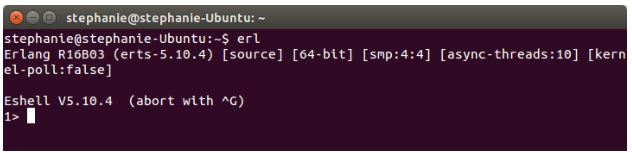

### Instalación en Windows

1. Ingrese al link de [Erlang](https://www.erlang.org/)


<div>
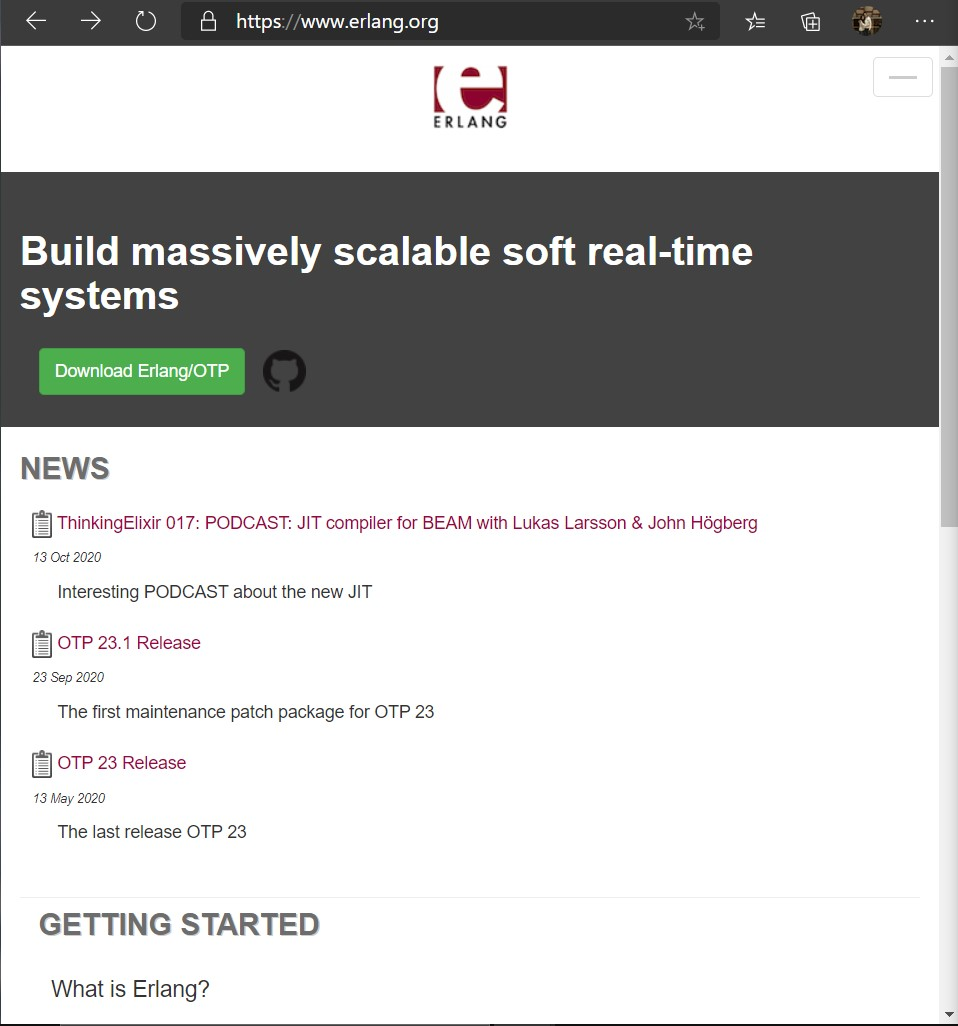
</div>


2. En la pestaña **Download Erlang/OTP** seleccionar la opción correspondiente a su SO (e.g *OTP 23.1 Windows 64-bit Binary File*)


<div>
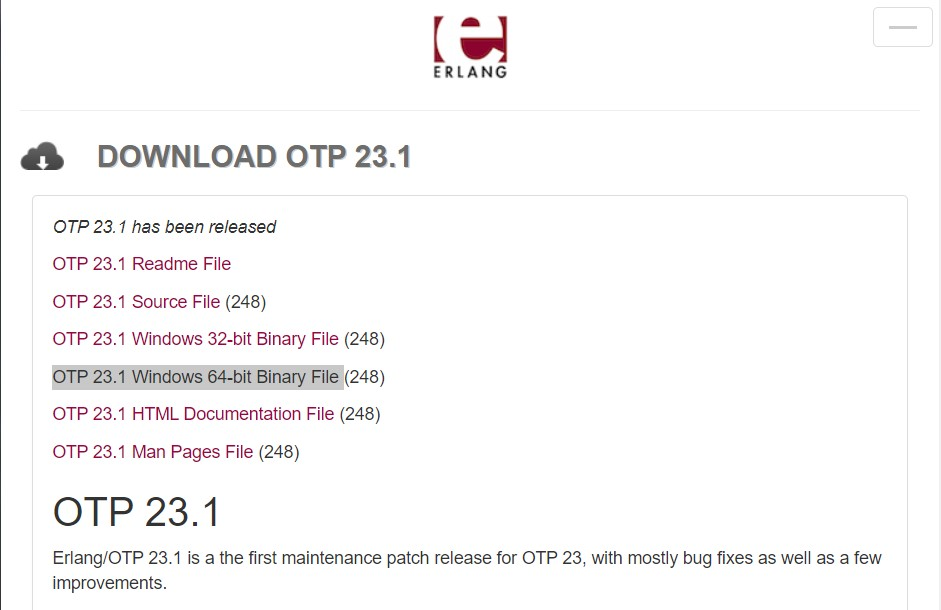
</div>


3. Seguir los pasos de instalación comúnes del software de Windows.


<div>
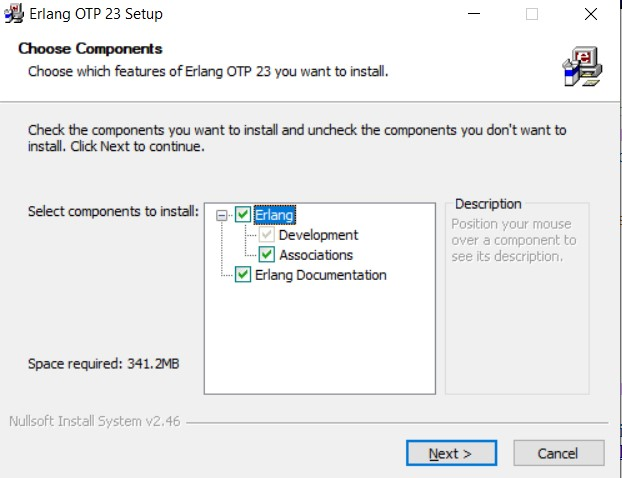
</div>


4. Añadir Erlang a las variables de entorno del sistema.


<div>
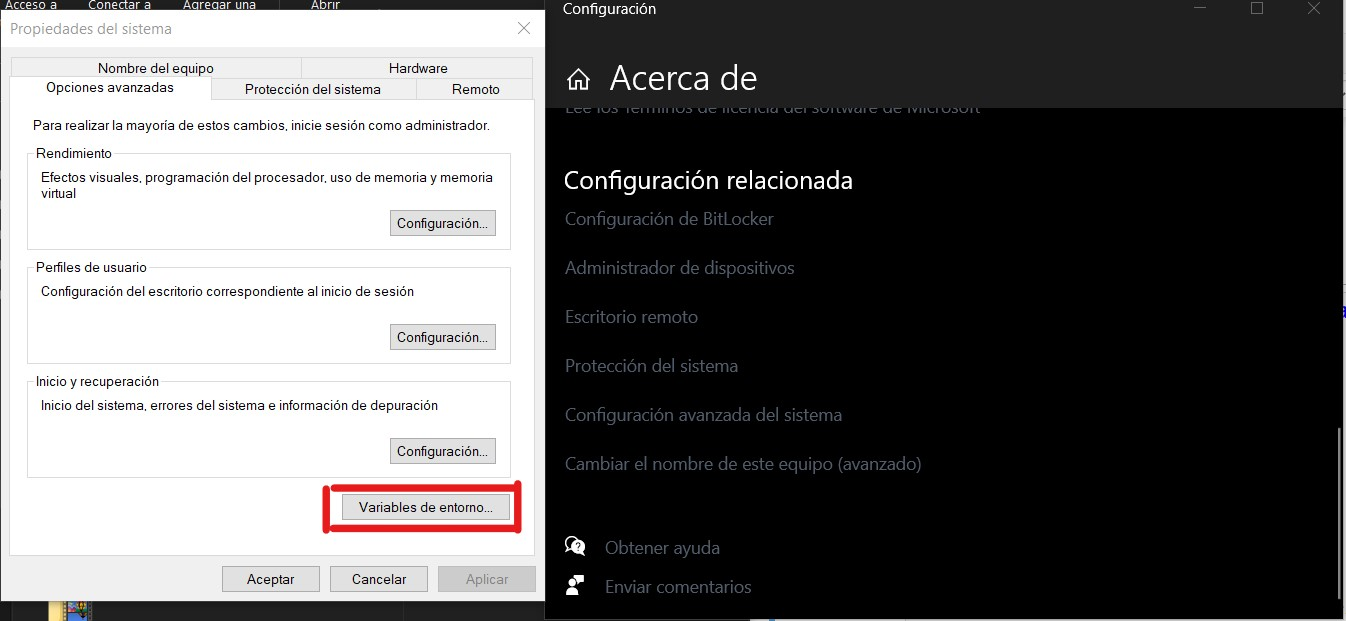
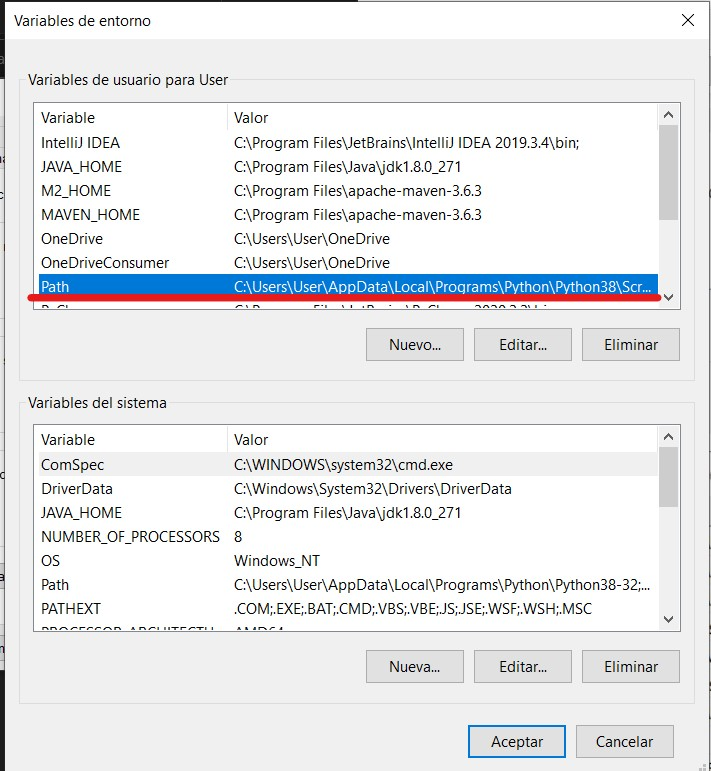
</div>





<div>
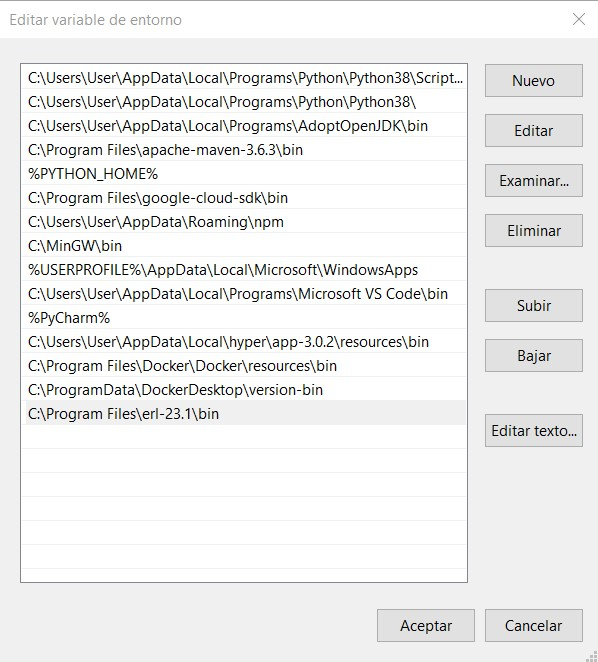
</div>
<div align= "center "><i>Añadir la ruta de erl-23.1</i></div>


5. Comprobar la instalación


<div>
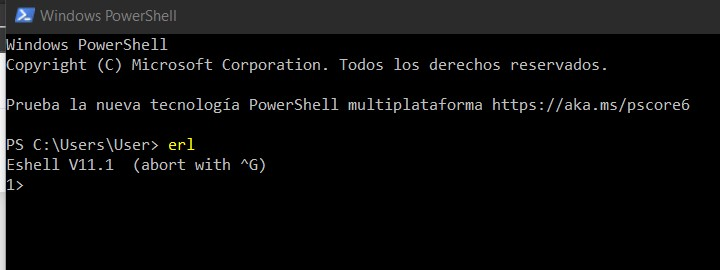
</div>



## 2. Sintaxis y generalidades del lenguaje.

### 1. Modulos

Erlang se componente de modulos que se puede definir como una secuencia de atributos y funciones.

Para exportar una funcion se necesita su usar la sentencia export([]) donde se ingresa el nombre de la funcion seguido del numero de parametros

In [3]:
-module(hello_world).
-compile(export_all).
-export([hello/0]).

hello() ->
    io:format("hello world~n"). % ~n new line

:2: Warning: export_all flag enabled - all functions will be exported


{module,hello_world}


### 2. Compilación
Erlang es un lenguaje compilado donde cada modulo necesita ser compilado para poder ser usado.
La compilacion se hace por medio del shell de Erlang

In [1]:
c(hello_world).

error: function_clause

In [2]:
hello_world:hello().

hello world


ok


### 3. Tipos de datos

Erlang soporta 3 tipos de datos

*   Numericos (Enteros y reales)
*   Booleanos
*   Atoms
*   Strings



In [9]:
-module(data_types).
%-compile(export_all).
-export([println/1 , start/0]).

println(Something) -> io:format("~p~n", [Something]).

start() ->
    println([2+3, 2.3e3]),
    println(true and false),
    println(soyUnAtom),
    println("Erlang").

{module,data_types}


In [7]:
data_types:println(something).


something


ok


In [8]:
data_types:start().

[5,2.3e3]
false
soyUnAtom
"Erlang"


ok


**Atom:** Unidad inmutable la cual toma como valor su propio nombre. Inicia en minuscula.

In [10]:
myAtom.

myAtom


In [11]:
cuadrado.

cuadrado


In [12]:
circulo.

circulo


### 4. Variables y constantes


*   Una vez inicializadas no pueden cambiar de valor
*   Deben iniciar por mayuscula
*   Pueden contener @ o _

In [13]:
Myvar = 100.

100


In [14]:
B = true.

true


In [15]:
Atom_var = myAtom.

myAtom


In [16]:
_ = 10. % variable anonima

10


In [17]:
-module(constants). % constantes
-compile(export_all).


-define(Pi, 3.1416).
-define(M, "Erlang Presentation").
-define(SQUARED (X), X*X).


showConstants() ->
    io:format("N = ~p ~n", [?Pi]),
    io:format("M = ~p ~n", [?M]),
    io:format("~p ~n", [?SQUARED(5)]).

{error,[{5,erl_parse,"bad attribute"},
        {6,erl_parse,"bad attribute"},
        {7,erl_parse,"bad attribute"},
        {11,erl_parse,["syntax error before: ","'?'"]}]}


### 5. Funciones 

In [18]:
-module (funciones).
-compile(export_all).

sum(A,B) ->
A+B.

fac(0) ->
    1;
fac(N) when N>0 ->
    N * fac(N-1).


start() ->
  A = 2,
  B = 3,
  C = sum(A,B),
  D = fac(C),
  io:fwrite("~w",[D]).

:2: Warning: export_all flag enabled - all functions will be exported


{module,funciones}


In [19]:
funciones:start().

120

ok


### 6. Estructuras

### Strings

Los strings no existe pero pueden ser emulados a través de arreglos donde cada elemento es la representación en Unicode del caracter.

In [20]:
Name = "juan".

"juan"


In [21]:
Name2 = [106, 117, 97, 110].

"juan"


In [22]:
Name == Name2.

true


### Listas


In [23]:
L = [1,2,3,4,5,6],
Ll = [1, "uno", uno,{1,2},[10,20,30]].

[1,"uno",uno,{1,2},[10,20,30]]


In [1]:
[V1 | Remaining ] = [1,2,3,4,5,6,7,8,9,10],
io:format("~p~n", [V1]),
io:format("~p~n", [Remaining]).

1
[2,3,4,5,6,7,8,9,10]


ok


In [2]:
[V2,V3,V4 | Rem ] = [1,2,3,4,5,6,7,8,9,10],
io:format("~p~n", [V2]),
io:format("~p~n", [V3]),
io:format("~p~n", [V4]),
io:format("~p~n", [Rem]).

1
2
3
[4,5,6,7,8,9,10]


ok


### Tuplas

Se utiliza principalmente en el Pattern Matching y la representación ordenada de datos

In [3]:
T = {1, "uno", uno,{1,2},[10,20,30]}.

{1,"uno",uno,{1,2},[10,20,30]}


In [4]:
-module (basicOperations).
-compile(export_all).

basicMathOperation({suma, A,B}) -> A+B;
basicMathOperation({resta, A,B}) -> A-B.

mathOperation(Arg) ->
  case Arg of 
    {multiplicacion,A,B} -> A * B;
    {division,A,B} -> A / B;
    _ -> 0
  end.

start() ->
  io:format("Suma: ~p~n",[basicMathOperation({suma,2,3})]),
  io:format("Resta: ~p~n",[basicMathOperation({resta,2,3})]),
  io:format("Mul:~p~n",[mathOperation({multiplicacion,10,5})]),
  io:format("Div: ~p~n",[mathOperation({division,10,5})]).

:2: Warning: export_all flag enabled - all functions will be exported


{module,basicOperations}


In [5]:
basicOperations:start().


Suma: 5
Resta: -1
Mul:50
Div: 2.0


ok


### Diccionarios

In [6]:
Dic = #{name => "Juan Diego", age => 20},
io:format("~p~n", [maps:get(name, Dic)]),
io:format("~p~n", [Dic]).

"Juan Diego"
#{age => 20,name => "Juan Diego"}


ok


### Records

In [7]:
-module (records).
-compile([export_all]).

-record(person, {
        name,
        age,
        status = single
    }).

start() ->
    P1 = #person{name="Juan", age="20"},
    io:format("Created person ~p~n", [P1#person.name]),
    io:format("Record fields: ~p~n", [record_info(fields, person)]),
    io:format("Record size: ~p~n", [record_info(size, person)]).

:2: Warning: export_all flag enabled - all functions will be exported


{module,records}


In [8]:
records:start().

Created person "Juan"
Record fields: [name,age,status]
Record size: 4


ok


### If / Else

In [9]:
-module (if_else).
-compile(export_all).

compare(X, Y) ->
    Result = if
        X > Y -> greater;
        X == Y -> equal;
        X < Y -> less
    end,
    io:format(Result).

start() ->
    compare(5, 1).

:2: Warning: export_all flag enabled - all functions will be exported


{module,if_else}


In [11]:
if_else:start().

greater

ok


### Case of

In [10]:
-module(case_of).
-compile([export_all]).

admit(Person) ->
    case Person of
        {male, Age} when Age >= 21 -> yes_with_cover;
        {female, Age} when Age >= 21 -> yes_no_cover;
        {male, _} ->  no_boy_admission;
        {female, _} -> no_girl_admission;
        _ ->  unknown
    end.

run() ->
    AdultMale = {male, 25},
    io:format(admit(AdultMale)),
    io:nl(),
    AdultFemale = {female, 25},
    io:format(admit(AdultFemale)),
    io:nl(),
    KidMale = {male, 5},
    io:format(admit(KidMale)),
    io:nl(),
    KidFemale = {female, 5},
    io:format(admit(KidFemale)),
    io:nl().

:2: Warning: export_all flag enabled - all functions will be exported


{module,case_of}


In [12]:
case_of:run().

yes_with_cover
yes_no_cover
no_boy_admission
no_girl_admission


ok


## 3. Programación concurrente.

### 1. Procesos


Una de las razones por las que se recomienda **Erlang** por encima de otros lenguajes funcionales es su habilidad de manejar concurrencia y programación distribuida.

Por concurrencia se refiere a la capacidad de los programas para manejar múltiples hilos de ejecución al mismo tiempo. Por ejemplo, los sistemas operativos más modenos le permiten utilizar múltiples programas al tiempo (por ejemplo, el navegador, al mismo tiempo que un procesador de texto, un cliente de correo y diversos documentos pendientes para su impresión). 


Cada procesador dentro del CPU probablemente está corriendo un hilo o tarea al tiempo, pero cambia tan rápidamente de tareas que produce la ilusión de estarlas corriendo todas al mismo tiempo.

**Erlang** tiene la capacidad de crear hilos paralelos de ejecución, además de permitirles a estos hilos comunicarse entre ellos. Cada uno de estos hilos de ejecución los conoceremos como **procesos**.

Se crean con la palabra reservada spawn y se usa así:
```
>spawn(modulo_a_ejecutar, funcion_exportada, [lista_de_argumentos]).

```
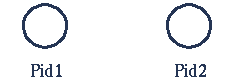

### Ejemplo

In [2]:
-module(tut14).

-export([start/0, say_something/2]).

say_something(What, 0) ->
    done;
say_something(What, Times) ->
    io:format("~p~n", [What]),
    say_something(What, Times - 1).

start() ->
    spawn(tut14, say_something, [hello, 3]),
    spawn(tut14, say_something, [goodbye, 3]).

:5: Warning: variable 'What' is unused


{module,tut14}


In [3]:
tut14:say_something(hello, 3).

hello
hello
hello


done


In [10]:
tut14:start().

<0.157.0>


hello
goodbye
hello
goodbye
hello
goodbye


In [12]:
spawn(tut14, say_something, [goodbye, 3]).

goodbye


<0.159.0>


goodbye
goodbye


## 2. Comunicación entre procesos


La única forma de comunicación entre procesos en Erlang es a través de paso de mensajes. 
```
Pid ! Message

```
Un mensaje puede ser cualquier término **Erlang válido**. *send* es un primitivo que evalúa sus argumentos y envía su resultado.
```
foo(12) ! bar(baz)

```  

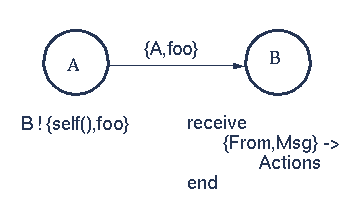

In [13]:
-module(tut15).

-export([start/0, ping/2, pong/0]).

ping(0, Pong_PID) ->
    Pong_PID ! finished,
    io:format("ping finished~n", []);

ping(N, Pong_PID) ->
    Pong_PID ! {ping, self()},
    receive
        pong ->
            io:format("Ping received pong~n", [])
    end,
    ping(N - 1, Pong_PID).

pong() ->
    receive
        finished ->
            io:format("Pong finished~n", []);
        {ping, Ping_PID} ->
            io:format("Pong received ping~n", []),
            Ping_PID ! pong,
            pong()
    end.

start() ->
    Pong_PID = spawn(tut15, pong, []),
    spawn(tut15, ping, [3, Pong_PID]).

{module,tut15}


In [14]:
tut15: start().

<0.162.0>


Pong received ping
Ping received pong
Pong received ping
Ping received pong
Pong received ping
Ping received pong
ping finished
Pong finished


## 3.Procesos registrados 

### Primitivos básicos para procesos registrados:


``` register(Name,Pid) ``` Asocia **Name** con el **Pid** correspondiente.  
``` unregister(Name)``` Elimina la asociación entre el átomo **Name** y el **proceso(Pid).**  
``` whereis(Name)``` Retorna el Pid asociado al nombre solicitado. Si no encuentra procesos con ese nombre asociado, retorna el átomo *undefined*.   
``` registered()``` Retorna la lista de todos los procesos identificados por “nombre propio”.

Erlang permite enviar un mensaje a otro proceso sin saber su identidad, por lo tanto debe existir una manera de registrar un proceso.

In [12]:
start() ->
    Pid = spawn(num_anal, server, [])
    register(analyser, Pid).

analyse(Seq) ->
    analyser ! {self(),{analyse,Seq}},
    receive
        {analysis_result,R} ->
            R
    end.


error: {badmatch,{error,{1,erl_parse,["syntax error before: ","'->'"]}}}

## 4.Timeout

Un ejemplo de un Timeout es este fragmento de codigo



```
receive
  Message1 [when Guard1] ->
    Actions1 ;
  Message2 [when Guard2] ->
    Actions2 ;
  ...
  after
    TimeOutExpr ->
      ActionsT
end
```



**TimeOutExpr** es una expresión que se evalúa como un número entero que se interpreta como un tiempo dado en milisegundos. La precisión del tiempo estará limitada por el sistema operativo o el hardware en el que se implemente Erlang; es un problema local. Si no se ha seleccionado ningún mensaje dentro de este tiempo, se agota el tiempo de espera y se programa la evaluación de ActionsT. Cuando se evalúan realmente depende, por supuesto, de la carga actual del sistema.

#### Ejemplo ¿Fue click o doble click?

La función **get_event** esperará un mensaje y luego imprime un átomo que representa el evento que ocurrió. Queremos poder detectar los clics dobles del mouse, es decir, dos clics del mouse en un período corto de tiempo. Si se recibe un evento de clic del mouse, evaluamos otro **receive** para esperar el siguiente mensaje de clic del mouse. Este segundo **receive**, sin embargo, tiene un tiempo de espera, por lo que si un segundo mensaje de clic del mouse no ocurre dentro del tiempo requerido (el valor de retorno de **doubleClickInterval**), la recepción se agota y la función **get_event** devuelve *single_click*. Si se recibe el segundo mensaje de clic del mouse antes del tiempo de espera, se devuelve *double_click*

In [1]:
-module(time1).
-export([doubleClickExample/0, singleClickExample/0, getEvent/0, mouseClick/1, doubleClick/1, singleClick/1]).

doubleClickInterval() -> 300.

getEvent() ->
  receive
    {mouse, click} ->
      receive
        {mouse, click} ->
          io:format("double_click~n")
      after doubleClickInterval() -> % 300 ms
          io:format("single_click~n")
      end
  end.

mouseClick(PidGetEvent) ->
  PidGetEvent ! {mouse, click},
  io:format("click~n").

doubleClick (PidGetEvent) -> 
  mouseClick(PidGetEvent),
  timer:sleep(200),
  mouseClick(PidGetEvent).

singleClick (PidGetEvent) -> 
  mouseClick(PidGetEvent).

doubleClickExample() -> 
  PidGetEvent = spawn(time1, getEvent, []),
  doubleClick(PidGetEvent),
  '_'.

singleClickExample() -> 
  PidGetEvent = spawn(time1, getEvent, []),
  singleClick(PidGetEvent),
  '_'.

{module,time1}


In [2]:
time1:doubleClickExample().

click
click
double_click


'_'


In [3]:
time1:singleClickExample().

click


'_'


single_click


### Long example : A simple messenger

Este ejemplo sigue la [guia oficial](https://erlang.org/doc/getting_started/conc_prog.html#a-larger-example). 

Antes que nada, clona el [repositorio](https://github.com/gavendanoc-learning/simple-messenger) con el codigo.

En primer lugar, se debe crear un cluster con nodos de erlang. Estos nodos pueden estar localizados en distintos computadores o en uno solo, para este ejemplo iniciaremos los nodos en un mismo computador. 

##### ¿Que son los nodos en erlang? 
Es una instancia de la maquina virtual de erlang ([fuente](https://stackoverflow.com/questions/38913670/what-is-an-erlang-node)), es muy ligera y se crea cada vez que se llama al comando `$ erl` en la terminal. Un nodo se identifica de la forma `username@host`. Para llamar a un nodo y darle un nombre se le llama así:

```shell
$ erl -sname gabo@mycomputer
```

La parte de `username` se puede escojer, puede ser una ciudad, un nombre o algo divertido. Por el contrario, `host` **NO** se puede escoger, este tiene que ser literalmente el usuario del computador.  

Para saber cual es el nombre del usuario se debe llamar este comando dentro de la terminal de erlang. Abra el shell de erlang con `$ erl` en la terminal  e introdusca: 

```shell
1> inet:gethostname().
output: {ok,"DESKTOP-D02VGLV"}
```

Por ejemplo, los nodos en este ejemplo se pueden llamar `pepe@DESKTOP-D02VGLV`, `miguel@DESKTOP-D02VGLV`, `papas_a_la_francesa@DESKTOP-D02VGLV`. Lo que sea...

Por ultimo, no se necesario crear los nodos con el nombre del host, podemos simplemente utilizar `$ erl -sname gabo` y el host se añade automaticamente. 

##### Setup

###### 0. Intro

En esta simulacion se tendran tres nodos: 
- *nodo messenger* : Corresponde a un nodo donde se ubica el servidor, es el intermediario entre los dos nodos. 
- *nodo ibague* : Corresponde a un nodo "en" la ciudad de ibague, donde un usuario quiere escribir mensajes a otro en neiva. 
- *nodo neiva* : Corresponde a un nodo "en" la ciudad de neiva, donde un usuario quiere escribir mensajes a otro en ibague.

###### 1. Crear los nodos
En este ejemplo se crean tres nodos, por tal motivo se abren **tres terminales** y en cada una se introduce lo sigueinte:

```shell
$ erl -sname messenger
$ erl -sname ibague
$ erl -sname neiva
```

**Importante:** En este ejemplo el host es `DESKTOP-D02VGLV` que es la maquina con la que se hace la simulacion, cuando se haga en otra maquina el host seguro va a cambiar. Para revisar el host se ejecuta `1> inet:gethostname()` en el shell de erlang. [Fuente](https://stackoverflow.com/questions/13753741/cant-get-two-erlang-nodes-to-communicate)

###### 2. Modificar el codigo
Se debe poner en a funcion el identificador del nodo del servidor. Por ejemplo, 

```erlang
%%% Change the function below to return the name of the node where the
%%% messenger server runs
server_node() ->
    'messenger@DESKTOP-D02VGLV'. % Change this
```

###### 3. Compilar el codigo
```shell
2> c(messenger).
```

###### 4. Seguir el tutorial oficial
Estos pasos eran un poco complicados, pero ya debe tener el conocimiento suficiente para seguir la [guia oficial](https://erlang.org/doc/getting_started/conc_prog.html#a-larger-example). Happy coding!



